# CLustering & PCA Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing data
country=pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Getting information about the columns
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
#We see there are no null values in any of the column
#checking the % of NAs columnwise
country.isnull().sum()*100/country.shape[0] 

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [5]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


We see there are 3 columns(Exports,health and imports) that are expressed as percentages of total GDP which is calculated using the total population. As we do not have the information about the population for each country, we keep the columns as %ages itself.

In [6]:
#We notice the differnce in the units and ranges of the columns, we will perform scaling to get them all in the same range next

In [7]:
#let us get the remove the list of countries and store it separately
country_df=country.copy()
y=country.pop("country")
y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

Performing standardization before we proceed with PCA

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
col=country.columns
country[col]=scaler.fit_transform(country[col])
country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [10]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,2.127373e-16,5.504579e-16,2.765585e-16,-7.977650e-17,1.063687e-16,3.696311e-16,3.044803e-16,5.850277e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [11]:
#Scaling is done, we proceed with PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(random_state=50)

In [14]:
pca.fit(country)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
#components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [16]:
#Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

We see that 4 components are able to explain 85+  variance, let's plot a scree graph to assermt it

In [17]:
#Getting the cummulative sums of the explained variance ratios
pca_cum=np.cumsum(pca.explained_variance_ratio_)

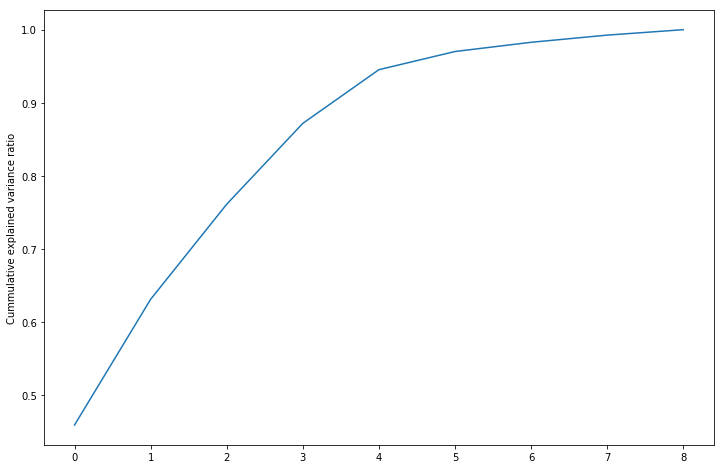

In [18]:
#Building scree plot 
plt.figure(figsize=[12,8])
plt.plot(pca_cum)
plt.ylabel("Cummulative explained variance ratio")
plt.show()

Perform PCA with 4 components
Incremental PCA is used to make the build faster

In [19]:
#We can use a PCA function here as dataset is small, but we are using icremental pca here
from sklearn.decomposition import IncrementalPCA
pca=IncrementalPCA(n_components=4)
df_pca=pca.fit_transform(country)
df_pca.shape

(167, 4)

Creating dataframe with the new PCA components and merging them with the orignal column Country

In [20]:
#Storing the pca transformed variables into a dataframe
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2","PC3","PC4"])
df_pca.head()
#this has pca components with outliers

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [21]:
#Merging them with the countries list we separated earlier
df_coun = pd.concat([df_pca, y],axis=1)
df_coun.head()

,PC1,PC2,PC3,PC4,country
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan
1,0.429358,-0.587859,0.321052,-1.171193,Albania
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria
3,-2.930969,1.699437,-1.521734,0.875966,Angola
4,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda


### Outlier Analysis

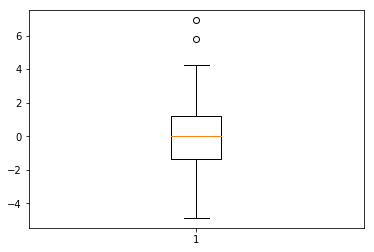

In [22]:
## Let's perform Outlier Analysis with country column included
plt.boxplot(df_coun.PC1)
Q1 = df_coun.PC1.quantile(0.05)
Q3 = df_coun.PC1.quantile(0.95)
IQR = Q3 - Q1
df_coun = df_coun[(df_coun.PC1 >= Q1) & (df_coun.PC1 <= Q3)]

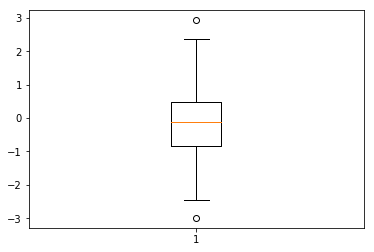

In [23]:
plt.boxplot(df_coun.PC2)
Q1 = df_coun.PC2.quantile(0.05)
Q3 = df_coun.PC2.quantile(0.95)
IQR = Q3 - Q1
df_coun = df_coun[(df_coun.PC2 >= Q1) & (df_coun.PC2 <= Q3)]

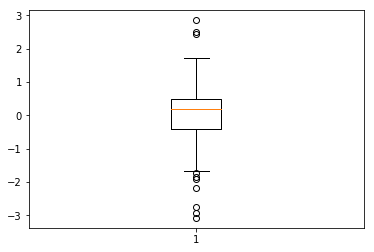

In [24]:
plt.boxplot(df_coun.PC3)
Q1 = df_coun.PC3.quantile(0.05)
Q3 = df_coun.PC3.quantile(0.95)
IQR = Q3 - Q1
df_coun = df_coun[(df_coun.PC3 >= Q1) & (df_coun.PC3 <= Q3)]

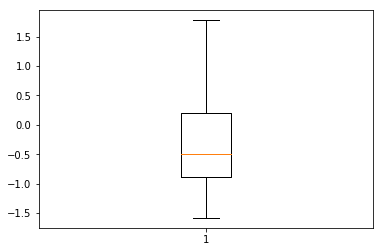

In [25]:
plt.boxplot(df_coun.PC4)
Q1 = df_coun.PC4.quantile(0.05)
Q3 = df_coun.PC4.quantile(0.95)
IQR = Q3 - Q1
df_coun = df_coun[(df_coun.PC4 >= Q1) & (df_coun.PC4 <= Q3)]

In [26]:
df_coun.shape

(107, 5)

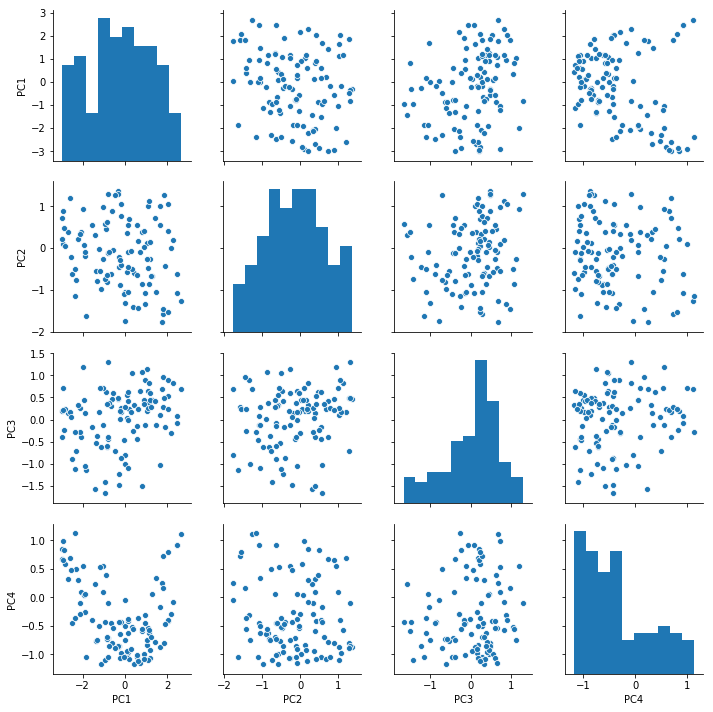

In [27]:
#scatter plots for PCs
sns.pairplot(df_coun)

## Let's see if K-Means can be performed using the Hopkins measure

In [28]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
df_pca2=df_coun.drop(['country'],axis=1)
df_pca2.head()
#now this dataframe has PCA components after outlier treatment
df_pca2.shape
# df_coun.shape

(107, 4)

In [30]:
hopkins(df_pca2)

0.6641264146029944

As the value is >0.5 we can assume that clustering is possible

### K means clustering

In [31]:
# importing packages needed for KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Let's find the number of clusters

In [32]:
df=df_pca2
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ssa = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df)
    ssa.append([k, silhouette_score(df, kmeans.labels_)])

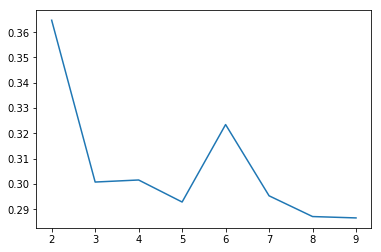

In [33]:
plt.plot(pd.DataFrame(ssa)[0], pd.DataFrame(ssa)[1]);

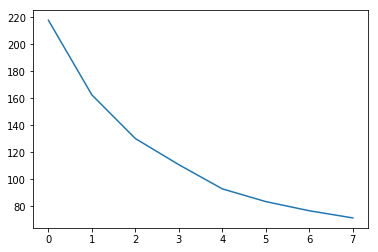

In [34]:
#We conclude that 2 seems to be a good number of clusters for K means algorithm
#Now let's do the elbow curve method
ssd = []
for num_clusters in list(range(2,10)):
    clus_model = KMeans(n_clusters = num_clusters, max_iter=50)
    clus_model.fit(df)
    ssd.append(clus_model.inertia_)

plt.plot(ssd)

In [35]:
#Here also we're seeing a distinct bend at around 2 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=2
clus_model = KMeans(n_clusters = 2, max_iter=50,random_state = 50)
clus_model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [36]:
#Since df_coun was treated for outliers it has some missing indexes, which will cause problems while merging so let's fix that
df1=df_coun
df1.index = pd.RangeIndex(len(df1.index))
#Let's assign the cluster labels to this dataframe
km_df = pd.concat([df1, pd.Series(clus_model.labels_)],axis=1)
km_df.columns = ['PC1', 'PC2','PC3','PC4','country','ClusterID']
km_df.head(10)

,PC1,PC2,PC3,PC4,country,ClusterID
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan,0
1,0.429358,-0.587859,0.321052,-1.171193,Albania,1
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria,0
3,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda,1
4,0.028470,-1.756721,-0.793520,-0.052486,Argentina,1
5,-0.180006,-0.393752,-0.864255,-0.426657,Azerbaijan,1
6,1.266074,-0.665088,0.453533,0.059479,Bahamas,1
7,1.670737,0.560394,-1.020168,-0.178515,Bahrain,1
8,-1.127417,-0.968982,-0.611645,-1.163111,Bangladesh,0
9,1.080093,-0.486679,0.649528,-0.533559,Barbados,1


In [37]:
km_df.shape

(107, 6)

In [38]:
km_df.ClusterID.value_counts()

1    58
0    49
Name: ClusterID, dtype: int64

Visualization of the clusters formed on PC variables

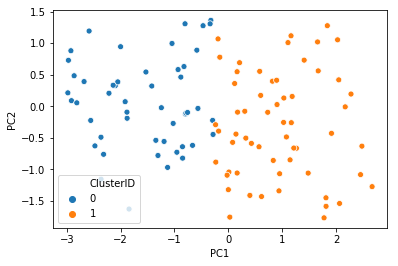

In [39]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=km_df)

We can clearly see the 2 distinct clusters being formed

Let us merge this dataframe with our original dataframe on column country

In [40]:
country_df.head()
#original dataframe

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [41]:
df_final= pd.merge(km_df,country_df,on='country',how='inner')
df_final.head()

,PC1,PC2,PC3,PC4,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.429358,-0.587859,0.321052,-1.171193,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
4,0.028470,-1.756721,-0.793520,-0.052486,Argentina,1,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


In [42]:
df_final.shape

(107, 15)

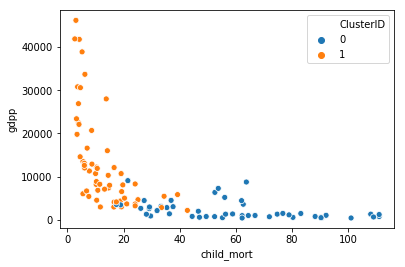

In [43]:
# Plotting the clusters on original variables
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data=df_final)

We can clearly see the 2 distinct clusters 

Some more plots to compare the difference in clusters

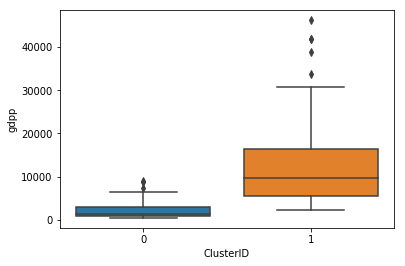

In [44]:
sns.boxplot(x='ClusterID', y='gdpp', data=df_final)

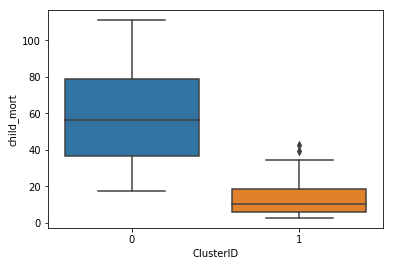

In [45]:
sns.boxplot(x='ClusterID', y='child_mort', data=df_final)

## Mean Analysis of clusters

In [46]:
dflist=[]
cols=country.columns
cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [47]:
#For all these columns we perform calculate mean per cluster
#creating a list of dataframes containing means of each column per cluster
for i in range(0,len(cols)):
    dflist.append(pd.DataFrame(df_final.groupby(["ClusterID"])[cols[i]].mean()))


In [48]:
#combining all those dataframes
df_means_km = pd.concat(dflist,axis=1)
df_means_km = pd.concat([pd.Series([0,1]),df_means_km], axis=1)
cols=cols.insert(0,"ClusterID")
df_means_km.columns = cols
df_means_km

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,59.422449,30.462837,5.346939,40.280937,4974.448980,10.008469,64.322449,3.961633,2228.612245
1,1,13.118966,44.034483,7.335517,47.403448,19048.965517,4.547483,75.765517,1.955517,13379.310345


Here we can see that that cluster that should be aided will be cluster - 0 with high child_mort, low income and low gdpp

## Performing k means with a different value of k
Lets choose k as 3 this time

In [49]:
clus_model2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
clus_model2.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [50]:
km_df2 = pd.concat([df1, pd.Series(clus_model2.labels_)],axis=1)
km_df2.columns = ['PC1', 'PC2','PC3','PC4','country','ClusterID']
km_df2.head(10)

,PC1,PC2,PC3,PC4,country,ClusterID
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan,2
1,0.429358,-0.587859,0.321052,-1.171193,Albania,0
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria,0
3,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda,1
4,0.028470,-1.756721,-0.793520,-0.052486,Argentina,0
5,-0.180006,-0.393752,-0.864255,-0.426657,Azerbaijan,0
6,1.266074,-0.665088,0.453533,0.059479,Bahamas,1
7,1.670737,0.560394,-1.020168,-0.178515,Bahrain,1
8,-1.127417,-0.968982,-0.611645,-1.163111,Bangladesh,0
9,1.080093,-0.486679,0.649528,-0.533559,Barbados,1


In [51]:
km_df2.ClusterID.value_counts()

0    44
1    35
2    28
Name: ClusterID, dtype: int64

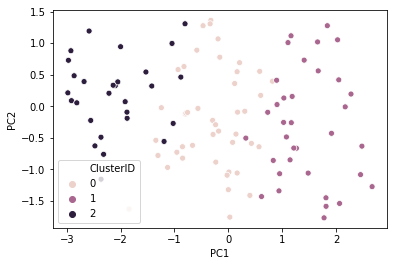

In [52]:
#Visualisation
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=km_df2)

We see 3 distinct clusters 

In [53]:
#let us combine this pca components dataframe with the original dataframe
df_final2= pd.merge(km_df2,country_df,on='country',how='inner')
df_final2.head()

,PC1,PC2,PC3,PC4,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan,2,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.429358,-0.587859,0.321052,-1.171193,Albania,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
4,0.028470,-1.756721,-0.793520,-0.052486,Argentina,0,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


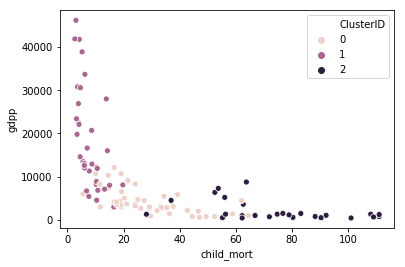

In [54]:
# Plotting the clusters on original variables
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data=df_final2)

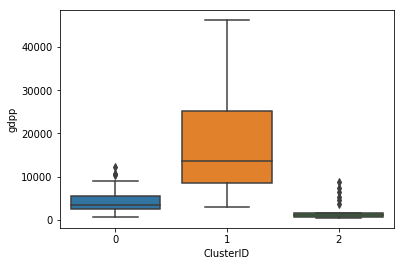

In [55]:
#plotting gdpp
sns.boxplot(x="ClusterID",y='gdpp',data=df_final2)

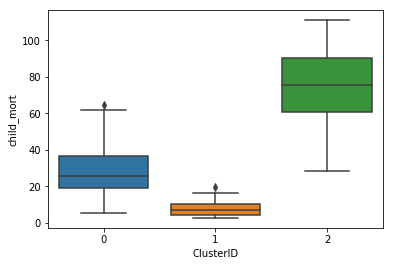

In [56]:
#plotting child_mort
sns.boxplot(x="ClusterID",y='child_mort',data=df_final2)

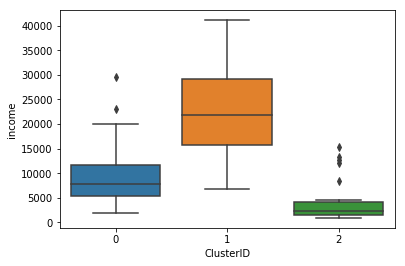

In [57]:
#plotting income
sns.boxplot(x="ClusterID",y='income',data=df_final2)

## Mean analysis of clusters

In [58]:
dflist1=[]
cols=country.columns
cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [59]:
#For all these columns we perform calculate mean per cluster
#creating a list of dataframes containing means of each column per cluster
for i in range(0,len(cols)):
    dflist1.append(pd.DataFrame(df_final2.groupby(["ClusterID"])[cols[i]].mean()))

In [60]:
#combining all those dataframes
df_means_km2 = pd.concat(dflist1,axis=1)
df_means_km2 = pd.concat([pd.Series([0,1,2]),df_means_km2], axis=1)
cols=cols.insert(0,"ClusterID")
df_means_km2.columns = cols
df_means_km2

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,29.136364,36.165659,5.455455,42.271952,9612.727273,9.021500,71.218182,2.604545,4297.318182
1,1,7.928571,47.311429,8.142857,50.485714,23198.000000,2.331086,77.334286,1.753429,18304.857143
2,2,75.467857,28.553214,5.800714,39.150000,4060.642857,9.844107,60.925000,4.698929,1980.357143


Here we can see that that cluster that should be aided will be cluster - 2 with high child_mort, low income and low gdpp

## Hierachical Clustering

Let us Perform hierarchical clustering with single and complete linkage on our PC dataset and obtain the cluster id

In [61]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


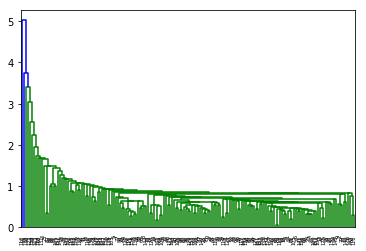

In [62]:
# single linkage
merging = linkage(df_pca, method="single", metric='euclidean')
dendrogram(merging)
plt.show()

Cannot be sure about the clusters, let us see what the complete linkage results in

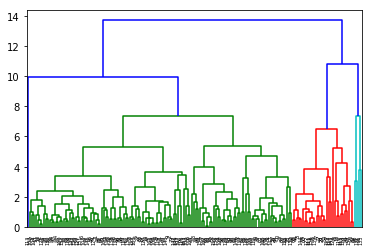

In [63]:
# complete linkage
merging = linkage(df_pca, method="complete", metric='euclidean')
dendrogram(merging)
plt.show()

Here we see 3 clusters being formed by complete linkage by cutting the dendogram at 8

In [64]:
# Let us create those 3 clusters
cluster_labels = cut_tree(merging, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [65]:
#let us asign the clsuter labels to our dataframe
#Reassigning indexes in the dataframe as these has some missing values from outlier analysis
df1=df_coun
df1.index = pd.RangeIndex(len(df1.index))
#assigning labels to the countries
hier_df = pd.concat([df1, pd.Series(cluster_labels)],axis=1)
hier_df.columns = ['PC1', 'PC2','PC3','PC4','country','ClusterID']
hier_df.head()

,PC1,PC2,PC3,PC4,country,ClusterID
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan,0
1,0.429358,-0.587859,0.321052,-1.171193,Albania,0
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria,0
3,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda,0
4,0.028470,-1.756721,-0.793520,-0.052486,Argentina,0


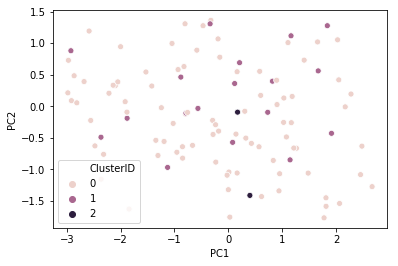

In [66]:
#Visualization on the clusters formed on PC variables
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=hier_df)

In [67]:
#merging them with the original dataframe
df_final_hier= pd.merge(hier_df,country_df,on='country',how='inner')
df_final_hier.head()

,PC1,PC2,PC3,PC4,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.429358,-0.587859,0.321052,-1.171193,Albania,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
4,0.028470,-1.756721,-0.793520,-0.052486,Argentina,0,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


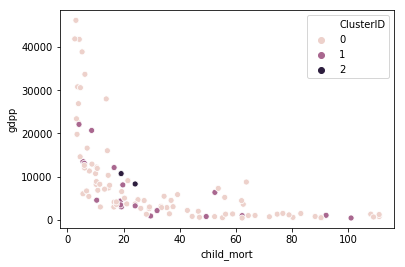

In [68]:
# plotting with original variables
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data=df_final_hier)

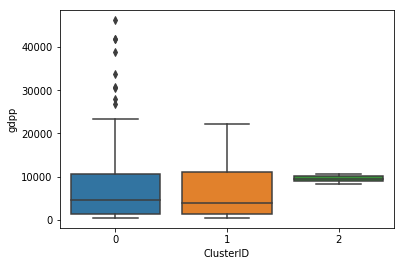

In [69]:
sns.boxplot(x='ClusterID', y='gdpp', data=df_final_hier)

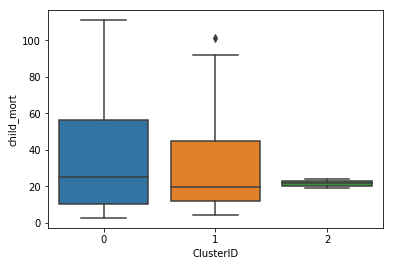

In [70]:
sns.boxplot(x='ClusterID', y='child_mort', data=df_final_hier)

### Mean analysis of clusters formed by hierarchical clustering

In [71]:
dflist2=[]
cols=country.columns
cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [72]:
#For all these columns we perform calculate mean per cluster
#creating a list of dataframes containing means of each column per cluster
for i in range(0,len(cols)):
    dflist2.append(pd.DataFrame(df_final_hier.groupby(["ClusterID"])[cols[i]].mean()))

In [73]:
#combining all those dataframes
df_means_hier = pd.concat(dflist2,axis=1)
df_means_hier = pd.concat([pd.Series([0,1,2]),df_means_hier], axis=1)
cols=cols.insert(0,"ClusterID")
df_means_hier.columns = cols
df_means_hier

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,35.158621,36.539989,6.545172,43.331792,12487.471264,7.412161,70.393103,2.906667,8569.287356
1,1,31.700000,44.155556,5.793333,49.411111,12776.555556,5.283389,70.750000,2.777222,6704.111111
2,2,21.600000,36.450000,6.875000,31.950000,16100.000000,7.105000,74.250000,2.335000,9500.000000


What we notice here is that, hierarchical clustering resulted in clusters that dont vary much when it comes to the means of the relevant columns like child_mort,gdpp and income 

Where as in k means, we saw the clear distinction in values when 3 clusters were formed. We shall proceed with the clusters formed by the k means clustering algorithm for this project

### Final model selected  -  K means with k=3

In [74]:
#Our final dataframe obtaianed with our optimal model
df_final2.head()

,PC1,PC2,PC3,PC4,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan,2,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.429358,-0.587859,0.321052,-1.171193,Albania,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
4,0.028470,-1.756721,-0.793520,-0.052486,Argentina,0,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


In [75]:
#let us once again see the mean values in the clusters in this model
df_means_km2

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,29.136364,36.165659,5.455455,42.271952,9612.727273,9.021500,71.218182,2.604545,4297.318182
1,1,7.928571,47.311429,8.142857,50.485714,23198.000000,2.331086,77.334286,1.753429,18304.857143
2,2,75.467857,28.553214,5.800714,39.150000,4060.642857,9.844107,60.925000,4.698929,1980.357143


Here we can see that that cluster that should be aided will be cluster - 2 with high child_mort, low income and low gdpp

WE have already some visualizions above

In [76]:
#Final list of countries which the government should aid
countries_Cluster2 = list(df_final2['country'][df_final2.ClusterID==2])
print(countries_Cluster2)

['Afghanistan', 'Benin', 'Botswana', 'Cameroon', 'Comoros', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Iraq', 'Kenya', 'Lao', 'Madagascar', 'Malawi', 'Mozambique', 'Namibia', 'Pakistan', 'Senegal', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Yemen', 'Zambia']


In [77]:
len(countries_Cluster2)

28

If the Govt cannot aid all 28 countries,Let us suggest the govt the countries which need their aid the most.

Now looking at the mean values, let's get the countries that are in the worst shape

In [78]:
#Taking the mean values as measures
#Basically using the binning concept and getting the final list of countries
countries_help=list(df_final2[(df_final2.child_mort > 75) & (df_final2.gdpp < 1980) & (df_final2.income < 4060)]['country'])
countries_help

['Afghanistan',
 'Benin',
 'Cameroon',
 'Comoros',
 "Cote d'Ivoire",
 'Gambia',
 'Guinea',
 'Lao',
 'Malawi',
 'Mozambique',
 'Sudan',
 'Togo',
 'Zambia']

### Mainly these 13 countries should be focused on by the Govt. 

NOTE: We had discarded the outliers completely

In [79]:
#Let us see which countries were dropped.
l1=list(country_df.country)
l2=list(df_final2.country)
out_count=[x for x in l1 if x not in l2]
print(out_count)

['Angola', 'Armenia', 'Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Burkina Faso', 'Burundi', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Denmark', 'Equatorial Guinea', 'France', 'Guinea-Bissau', 'Haiti', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kiribati', 'Kuwait', 'Lesotho', 'Liberia', 'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova', 'Netherlands', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Qatar', 'Rwanda', 'Saudi Arabia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Spain', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Sweden', 'Switzerland', 'Thailand', 'Uganda', 'United Arab Emirates', 'United States', 'Venezuela', 'Vietnam']


These countries were removed during outlier treatment

In [80]:
#Let us get the dataframe consisting of these countries from the original datframe
out_df=country_df[country_df.country.isin(out_count)]

In [81]:
out_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400


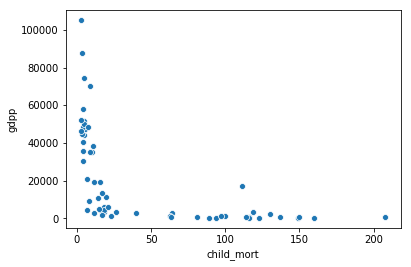

In [82]:
sns.scatterplot(x='child_mort',y='gdpp',legend='full',data=out_df)

If we want to merge these outliers with the clusters formed,
we can do that by putting them into a cluster whose mean value(Cluster centroid) is nearest to it (Euclidean distance)
But we are not going to do that and simply discard these outliers here.